## Import du dataset

In [1]:
#pip install wordcloud

In [2]:
#pip install transformers

In [3]:
#pip install tensorflow

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk import FreqDist
from wordcloud import WordCloud

import gensim
import transformers

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

import tensorflow as tf

import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

from transformers import TFAutoModel



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim


# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Stop words
from nltk.corpus import stopwords

In [147]:
import sklearn
from sklearn import feature_extraction
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [148]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import cv2 as cv
import tensorflow as tf
from keras.models import Model
from keras.applications import vgg16
from keras.applications import efficientnet_v2

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import make_scorer, silhouette_score
from matplotlib.image import imread

In [149]:
from PIL import Image
# example of using a pre-trained model as a classifier

#from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn.manifold import TSNE

In [150]:
import cv2
import cv2 as cv

In [151]:
import tensorflow_hub as hub

# Import data

In [152]:
data = pd.read_csv( 'Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [153]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [154]:
# Category extraction
cat_split = data['product_category_tree'].apply(lambda x: x.replace('"', '').replace('[', '').replace(']', '')).str.split(' >> ', expand=True)
for x in cat_split:
    data['product_category_' + str(x)] = cat_split[x].values

In [228]:
data['text'] = data['product_name'] + data['description']
data.dropna(subset=['text'], inplace=True)

In [229]:
print(data.shape)
data.head()

(1050, 29)


,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,...,product_category_3,product_category_4,product_category_5,product_category_6,text,sentence_bow,sentence_bow_lem,sentence_dl,length_bow,length_dl
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,...,Elegance Polyester Multicolor Abstract Eyelet ...,NaN,NaN,NaN,Elegance Polyester Multicolor Abstract Eyelet ...,"[e, l, e, g, a, n, c, e, , p, o, l, y, e, s, ...",elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,162,254
1,1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,...,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",NaN,NaN,Sathiyas Cotton Bath TowelSpecifications of Sa...,"[s, a, t, h, i, y, a, s, , c, o, t, t, o, n, ...",sathiyas cotton bath towelspecifications sathi...,sathiyas cotton bath towelspecifications of sa...,66,87
2,2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,...,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,NaN,NaN,Eurospa Cotton Terry Face Towel SetKey Feature...,"[e, u, r, o, s, p, a, , c, o, t, t, o, n, , ...",eurospa cotton terry face towel setkey feature...,eurospa cotton terry face towel setkey feature...,163,257
3,3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,...,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King size...,NaN,NaN,SANTOSH ROYAL FASHION Cotton Printed King size...,"[s, a, n, t, o, s, h, , r, o, y, a, l, , f, ...",santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,122,156
4,4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,...,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double B...,NaN,NaN,Jaipur Print Cotton Floral King sized Double B...,"[j, a, i, p, u, r, , p, r, i, n, t, , c, o, ...",jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,163,235


## Prepare data

## Preprocessing functions

In [226]:
#pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [231]:
%time
import contractions

# Test
test_text = """
            Y'all can't expand contractions I'd think. I'd like to know how I'd done that! 
            We're going to the zoo and I don't think I'll be home for dinner.
            Theyre going to the zoo and she'll be home for dinner.
            We should've do it in here but we shouldn't've eat it
            """
print("Test: ", contractions.fix(test_text))



CPU times: total: 0 ns
Wall time: 0 ns
Test:  
            You all cannot expand contractions I would think. I would like to know how I would done that! 
            We are going to the zoo and I do not think I will be home for dinner.
            They Are going to the zoo and she will be home for dinner.
            We should have do it in here but we should not have eat it
            


In [232]:
data['sentence_bow'] = data['text'].apply(lambda x: contractions.fix(x))

In [237]:
# check
print(data['text'][31])
print(data['sentence_bow'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
['Lenco', 'Bdblue', 'Tango', 'Analog', 'Watch', 'For', 'Men', ',', 'BoysLenco', 'Bdblue', 'Tango', 'Analog', 'Watch', 'For', 'Men', ',', 'Boys', 'Buy', 'Lenco', 'Bdblue', 'Tango', 'Analog', 'Watch', 'For', 'Men', ',', 'Boys', 'Bdblue', 'Online', 'at', 'Rs.599', 'in', 'India', 'Only', 'at', 'Flipkart.com', '.', 'Sports', 'Watch', ',', 'Casual', 'Watch', ',', 'Big', 'Size', 'Dial', ',', 'Colourful', 'Strap', 'Great', 'Discounts', ',', 'Only', 'Genuine', 'Products', ',', '30', 'Day', 'Replacement', 'Guarantee', ',', 'Free', 'Shipping', '.', 'Cash', 'On', 'Delivery', '!']


In [238]:
 def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

In [239]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [240]:
data['sentence_bow'] = data['text'].apply(lambda x : tokenizer_fct(x))

In [241]:
# check
print(data['text'][31])
print(data['sentence_bow'][31])


Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
['Lenco', 'Bdblue', 'Tango', 'Analog', 'Watch', 'For', 'Men', ',', 'BoysLenco', 'Bdblue', 'Tango', 'Analog', 'Watch', 'For', 'Men', ',', 'Boys', 'Buy', 'Lenco', 'Bdblue', 'Tango', 'Analog', 'Watch', 'For', 'Men', ',', 'Boys', 'Bdblue', 'Online', 'at', 'Rs.599', 'in', 'India', 'Only', 'at', 'Flipkart.com', '.', 'Sports', 'Watch', ',', 'Casual', 'Watch', ',', 'Big', 'Size', 'Dial', ',', 'Colourful', 'Strap', 'Great', 'Discounts', ',', 'Only', 'Genuine', 'Products', ',', '30', 'Day', 'Replacement', 'Guarantee', ',', 'Free', 'Shipping', '.', 'Cash', 'On', 'Delivery', '!']


In [242]:
display(data['text'].head())

0    Elegance Polyester Multicolor Abstract Eyelet ...
1    Sathiyas Cotton Bath TowelSpecifications of Sa...
2    Eurospa Cotton Terry Face Towel SetKey Feature...
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
Name: text, dtype: object

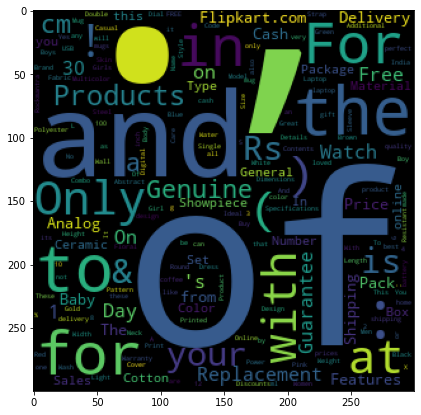

In [336]:
# raw texts
all_texts = list() # a list of all (non unique) words in descriptions

texts = data['text'].apply(tokenizer_fct)

for i in texts:
  all_texts.extend(i)

freq = FreqDist(all_texts)

# plot wordcloud
plt.figure(figsize=(7,7))
wordcloud = WordCloud(width=300, height=300).generate_from_frequencies(freq)
plt.imshow(wordcloud)

In [243]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [245]:
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

In [246]:
data['sentence_bow'] = data['text'].apply(lambda x : stop_word_filter_fct(x))


In [247]:
# check
print(data['text'][31])
print(data['sentence_bow'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
[]


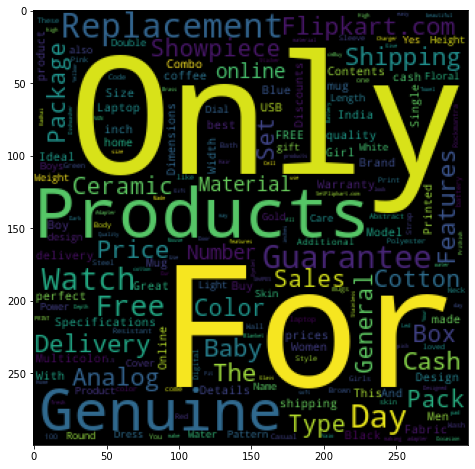

In [339]:
# stop_words_filter_fct
all_texts = list() # a list of all (non unique) words in descriptions

texts = data['text'].apply(tokenizer_fct)
texts = texts.apply(stop_word_filter_fct)

for i in texts:
  all_texts.extend(i)

freq = FreqDist(all_texts)

# plot wordcloud
plt.figure(figsize=(8,8))
wordcloud = WordCloud(width=300, height=300).generate_from_frequencies(freq)
plt.imshow(wordcloud)

In [248]:
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                
                                       and (not w.startswith("http"))]
    return lw

In [249]:
data['sentence_bow'] = data['text'].apply(lambda x : lower_start_fct(x))

In [250]:
display(data["text"].head(1))

0    Elegance Polyester Multicolor Abstract Eyelet ...
Name: text, dtype: object

In [251]:
# check
print(data['text'][31])
print(data['sentence_bow'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
['l', 'e', 'n', 'c', 'o', ' ', 'b', 'd', 'b', 'l', 'u', 'e', ' ', 't', 'a', 'n', 'g', 'o', ' ', 'a', 'n', 'a', 'l', 'o', 'g', ' ', 'w', 'a', 't', 'c', 'h', ' ', ' ', '-', ' ', 'f', 'o', 'r', ' ', 'm', 'e', 'n', ',', ' ', 'b', 'o', 'y', 's', 'l', 'e', 'n', 'c', 'o', ' ', 'b', 'd', 'b', 'l', 'u', 'e', ' ', 't', 'a', 'n', 'g', 'o', ' ', 'a', 'n', 'a', 'l', 'o', 'g', ' ', 'w', 'a', 't', 'c', 'h', ' ', ' ', '-', ' ', 'f', 'o', 'r', ' ', 'm', 'e', 'n', ',', ' ', 'b', 'o', 'y', 's', ' ', '-', ' ', 'b', 'u', 'y', ' ', 'l', 'e', 'n', 'c', 'o', ' ', 'b', 'd', 'b', 'l', 'u', 'e', ' ', 't', 'a', 'n', 'g', 'o', ' ', 'a', 'n', 'a', 'l

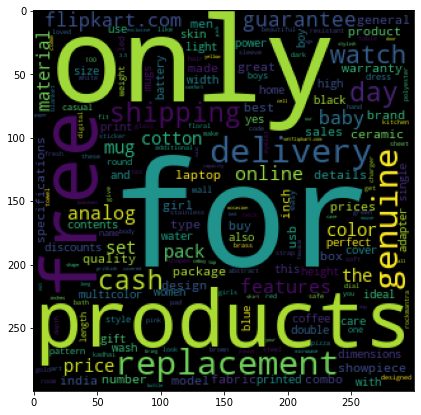

In [342]:
# stop_words_filter_fct + lower_fct
all_texts = list() # a list of all (non unique) words in descriptions

texts = data['text'].apply(tokenizer_fct)
texts = texts.apply(stop_word_filter_fct)
texts = texts.apply(lower_start_fct)

for i in texts:
  all_texts.extend(i)

freq = FreqDist(all_texts)

# plot wordcloud
plt.figure(figsize=(7,7))
wordcloud = WordCloud(width=300, height=300).generate_from_frequencies(freq)
plt.imshow(wordcloud)

In [252]:
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

In [254]:
data['sentence_bow'] = data['text'].apply(lambda x : lemma_fct(x))

In [255]:
# check
print(data['text'][31])
print(data['sentence_bow'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
['L', 'e', 'n', 'c', 'o', ' ', 'B', 'd', 'b', 'l', 'u', 'e', ' ', 'T', 'a', 'n', 'g', 'o', ' ', 'A', 'n', 'a', 'l', 'o', 'g', ' ', 'W', 'a', 't', 'c', 'h', ' ', ' ', '-', ' ', 'F', 'o', 'r', ' ', 'M', 'e', 'n', ',', ' ', 'B', 'o', 'y', 's', 'L', 'e', 'n', 'c', 'o', ' ', 'B', 'd', 'b', 'l', 'u', 'e', ' ', 'T', 'a', 'n', 'g', 'o', ' ', 'A', 'n', 'a', 'l', 'o', 'g', ' ', 'W', 'a', 't', 'c', 'h', ' ', ' ', '-', ' ', 'F', 'o', 'r', ' ', 'M', 'e', 'n', ',', ' ', 'B', 'o', 'y', 's', ' ', '-', ' ', 'B', 'u', 'y', ' ', 'L', 'e', 'n', 'c', 'o', ' ', 'B', 'd', 'b', 'l', 'u', 'e', ' ', 'T', 'a', 'n', 'g', 'o', ' ', 'A', 'n', 'a', 'l

In [256]:
# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [257]:
data['sentence_bow'] = data['text'].apply(lambda x : transform_bow_fct(x))

In [258]:
# check
print(data['text'][31])
print(data['sentence_bow'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
lenco bdblue tango analog watch for men boyslenco bdblue tango analog watch for men boys buy lenco bdblue tango analog watch for men boys bdblue online rs.599 india only flipkart.com sports watch casual watch big size dial colourful strap great discounts only genuine products day replacement guarantee free shipping cash delivery


In [259]:
# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

In [260]:
data['sentence_bow_lem'] = data['text'].apply(lambda x : transform_bow_lem_fct(x))

In [262]:
# check
print(data['text'][31])

print(data['sentence_bow'][31])

print(data['sentence_bow_lem'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
lenco bdblue tango analog watch for men boyslenco bdblue tango analog watch for men boys buy lenco bdblue tango analog watch for men boys bdblue online rs.599 india only flipkart.com sports watch casual watch big size dial colourful strap great discounts only genuine products day replacement guarantee free shipping cash delivery
lenco bdblue tango analog watch for men boyslenco bdblue tango analog watch for men boy buy lenco bdblue tango analog watch for men boy bdblue online rs.599 india only flipkart.com sport watch casual watch big size dial colourful strap great discount only genuine product day replacement guarantee

In [263]:
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


In [264]:
data['sentence_dl'] = data['text'].apply(lambda x : transform_dl_fct(x))

In [265]:
# check
print(data['text'][31])

print(data['sentence_bow'][31])

print(data['sentence_bow_lem'][31])

print(data['sentence_dl'][31])

Lenco Bdblue Tango Analog Watch  - For Men, BoysLenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
lenco bdblue tango analog watch for men boyslenco bdblue tango analog watch for men boys buy lenco bdblue tango analog watch for men boys bdblue online rs.599 india only flipkart.com sports watch casual watch big size dial colourful strap great discounts only genuine products day replacement guarantee free shipping cash delivery
lenco bdblue tango analog watch for men boyslenco bdblue tango analog watch for men boy buy lenco bdblue tango analog watch for men boy bdblue online rs.599 india only flipkart.com sport watch casual watch big size dial colourful strap great discount only genuine product day replacement guarantee

In [169]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sila\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [266]:
data.shape

(1050, 29)

In [267]:
data.to_csv("data_clean.csv")

# Préparation commune des traitements

In [268]:
data =  pd.read_csv("data_clean.csv")
print(data.shape)

(1050, 30)


In [269]:
l_cat = list(set(data['product_category_0']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data.iloc[i]['product_category_0'])) for i in range(len(data))]

catégories :  ['Watches', 'Baby Care', 'Computers', 'Beauty and Personal Care', 'Home Furnishing', 'Home Decor & Festive Needs', 'Kitchen & Dining']


In [270]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['length_bow'] = data['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data['length_bow'].max())
data['length_dl'] = data['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data['length_dl'].max())

max length bow :  383
max length dl :  636


## Fonctions communes

In [271]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation  par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des  par clusters')
    
    plt.show()
    print("ARI : ", ARI)


# Bag of word - Tf-idf

## Préparation sentences

In [272]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data[feat])
ctf_fit = ctf.fit(data[feat])

cv_transform = cvect.transform(data[feat])  
ctf_transform = ctf.transform(data[feat])  

## Exécution des modèles

In [273]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)


CountVectorizer : 
-----------------
ARI :  0.4627 time :  11.0

Tf-idf : 
--------
ARI :  0.5417 time :  9.0


## Graphiques

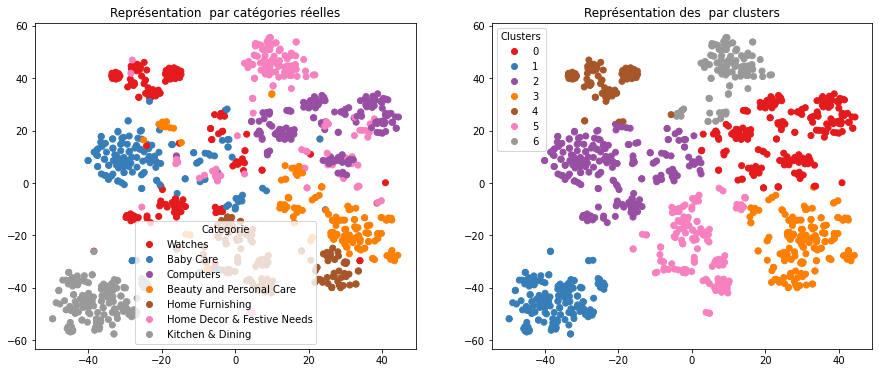

ARI :  0.5417


In [274]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Word2Vec

## Création du modèle Word2Vec

In [275]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences


In [276]:
sentences = data['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [277]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
                                               
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5062
Word2Vec trained


In [278]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5063


## Création de la matrice d'embedding

In [279]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5063, 300)


## Création du modèle d'embedding

In [280]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 24)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 24, 300)           1518900   
                                                                 
 global_average_pooling1d_3   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,518,900
Trainable params: 1,518,900
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [185]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [186]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.1996 time :  8.0


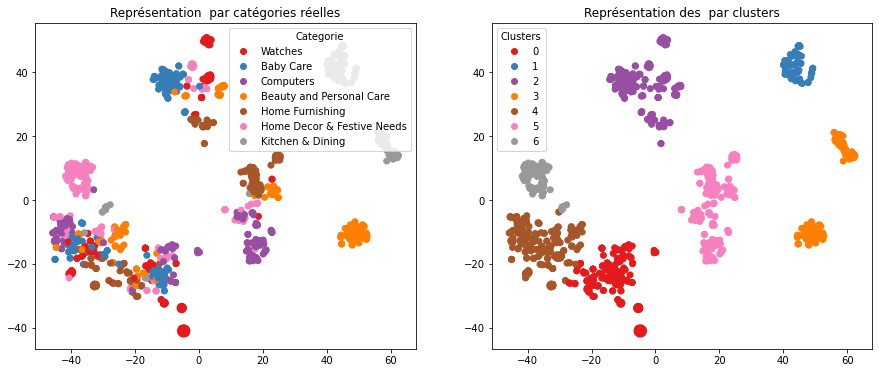

ARI :  0.1996


In [187]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [188]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


## Fonctions communes

In [189]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

In [190]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

In [191]:
data

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,...,product_category_3,product_category_4,product_category_5,product_category_6,text,sentence_bow,sentence_bow_lem,sentence_dl,length_bow,length_dl
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,...,Elegance Polyester Multicolor Abstract Eyelet ...,NaN,NaN,NaN,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,162,254
1,1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,...,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",NaN,NaN,Sathiyas Cotton Bath TowelSpecifications of Sa...,sathiyas cotton bath towelspecifications sathi...,sathiyas cotton bath towelspecifications sathi...,sathiyas cotton bath towelspecifications of sa...,66,87
2,2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,...,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,NaN,NaN,Eurospa Cotton Terry Face Towel SetKey Feature...,eurospa cotton terry face towel setkey feature...,eurospa cotton terry face towel setkey feature...,eurospa cotton terry face towel setkey feature...,163,257
3,3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,...,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King size...,NaN,NaN,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,122,156
4,4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,...,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double B...,NaN,NaN,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,163,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,...,Oren Empower Stickers,NaN,NaN,NaN,Oren Empower Extra Large Self Adhesive Sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,240,489
1046,1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.j

In [192]:
print(tf.__version__)

2.10.0


In [193]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['sentence_dl'].to_list()

In [194]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 565ms/step
temps traitement :  71.0


In [195]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.4013 time :  9.0


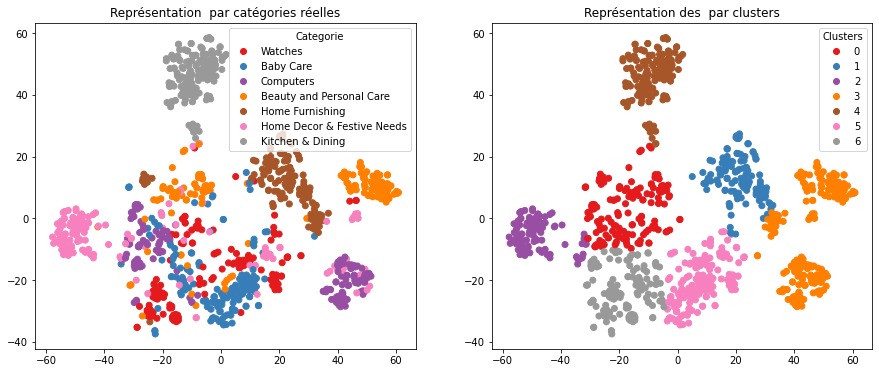

ARI :  0.4013


In [196]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [197]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [198]:
sentences = data['sentence_dl'].to_list()

In [199]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  69.0


In [200]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.4723 time :  9.0


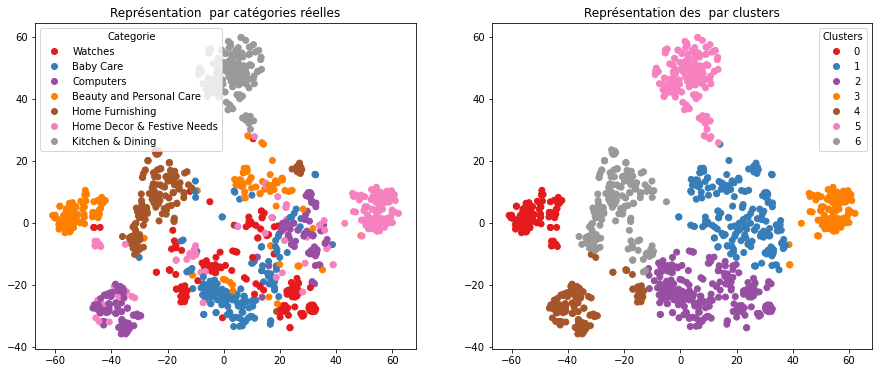

ARI :  0.4723


In [201]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## USE - Universal Sentence Encoder

In [202]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


In [203]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [204]:
batch_size = 10
sentences = data['sentence_dl'].to_list()

In [205]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [206]:
features_USE = feature_USE_fct(sentences, batch_size)

In [207]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4453 time :  10.0


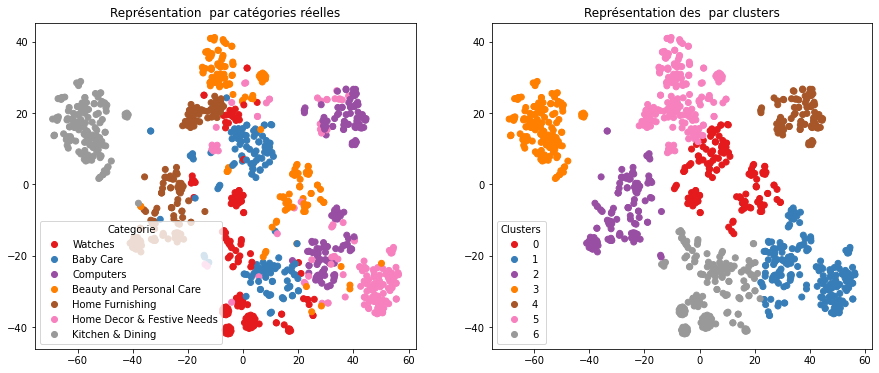

ARI :  0.4453


In [208]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Préparation de la base de données images

## Import du dataset

In [68]:
path = "C:/Users/Sila/Desktop/P6/Flipkart/Images/"

list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [69]:
data = pd.DataFrame()
data["image_path"] = list_photos
data

,image_path
0,009099b1f6e1e8f893ec29a7023153c4.jpg
1,0096e89cc25a8b96fb9808716406fe94.jpg
2,00cbbc837d340fa163d11e169fbdb952.jpg
3,00d84a518e0550612fcfcba3b02b6255.jpg
4,00e966a5049a262cfc72e6bbf68b80e7.jpg
...,...
1045,feefbdff924dd6b7cc266449c9a36d69.jpg
1046,ff24511994fc459d04145231c8876d6c.jpg
1047,ffbf3794aa8cb6bb8d3f313d0a549a09.jpg
1048,ffc2e1fc7c886ec09a331040ada038aa.jpg


In [304]:
l_cat = list(set(data['product_category_0']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data.iloc[i]['product_category_0'])) for i in range(len(data))]

catégories :  ['Watches', 'Baby Care', 'Computers', 'Beauty and Personal Care', 'Home Furnishing', 'Home Decor & Festive Needs', 'Kitchen & Dining']


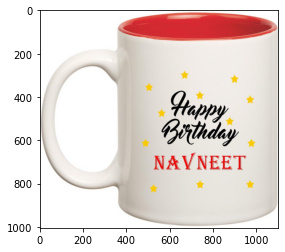

In [76]:
from PIL import Image
# Visualiser une image
image = Image.open(path+random.choice(list_photos))
plt.imshow(image)
plt.show()

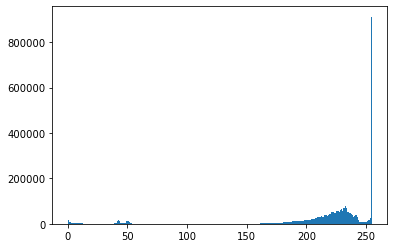

In [77]:
import matplotlib.pyplot as plt
img = np.array(image)
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

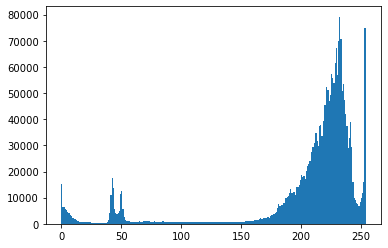

In [78]:
img = np.array(image)

n, bins, patches = plt.hist(img.flatten(), bins=range(255))
plt.show()

## Détermination et affichage des descripteurs SIFT

In [79]:
sift = cv2.xfeatures2d.SIFT_create()

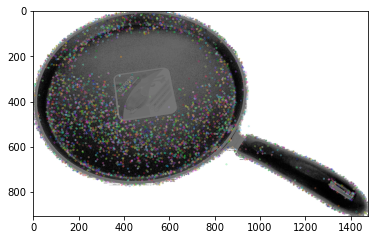

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [80]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [81]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           489.44 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [82]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :            16.47 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [83]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           187.26 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [84]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 498)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [85]:
from sklearn.manifold import TSNE
X = im_features
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1050, 2)

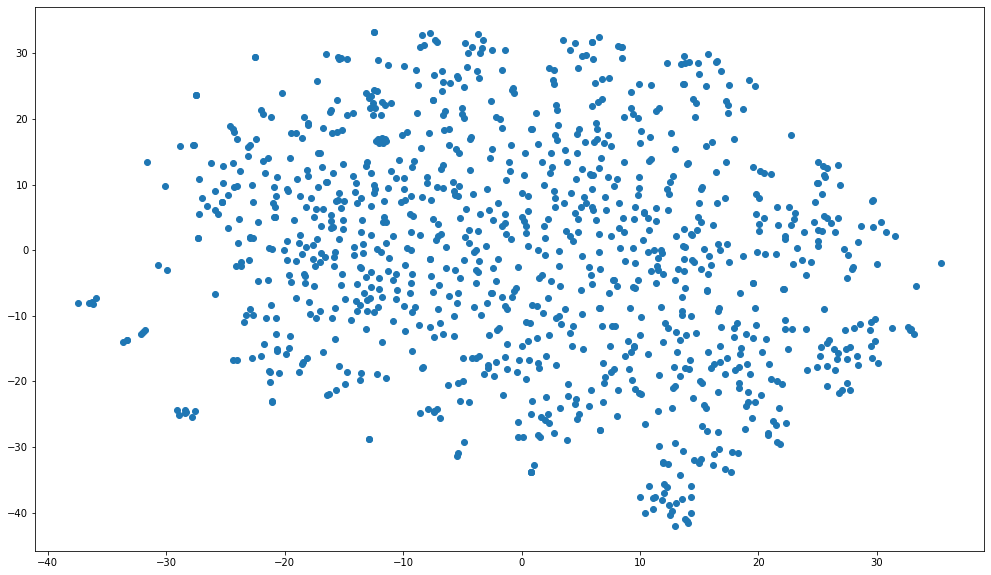

In [86]:
plt.figure(figsize = (17, 10), facecolor = None)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

## Détermination et affichage des descripteurs ORB

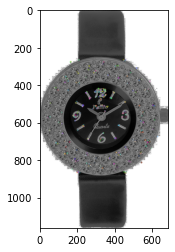

Descripteurs :  (500, 32)

[[162 161 111 ... 130  98 169]
 [163 177  96 ... 142 222 223]
 [ 70  50 173 ...  37 181 115]
 ...
 [ 80  22 254 ... 192  15 123]
 [161 157  25 ...   8 199 248]
 [ 16 169  59 ...  10 215 138]]


In [87]:
import cv2
import cv2 as cv
orb = cv.ORB_create()
image = cv2.imread(path+list_photos[0],0) # convertir en gris
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


Chaque image contient 500 descripteurs. 32 répresente la longueur de vecteur de chaque descripteur.

# Pré-traitement des images via ORB

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("orb_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("orb_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [88]:
# identification des points clés et des descripteurs associés
import time, cv2
orb_keypoints = []
temps1=time.time()
orb = cv.ORB_create(500) # 500 descripteurs par image

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convertir en gris
    res = cv2.equalizeHist(image)   # égaliser l'histogramme de l'image
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            91.96 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [89]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

# Il ya plusieurs possibilités pour calculer k dans la littérature. 2 principales : 
# - la racine carré du nombre total de descripteurs
k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :            27.43 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [90]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Création d'une matrice d'histogrammes
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calcule l'histogramme
    hist_vectors.append(hist) #l'histogramme est le vecteur caractéristique

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print()
print(im_features)
print()
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

[[0.    0.    0.004 ... 0.    0.    0.002]
 [0.    0.014 0.    ... 0.032 0.    0.   ]
 [0.    0.    0.    ... 0.    0.002 0.   ]
 ...
 [0.    0.    0.002 ... 0.01  0.    0.   ]
 [0.01  0.    0.    ... 0.    0.    0.002]
 [0.    0.014 0.    ... 0.006 0.012 0.002]]

temps de création histogrammes :           318.69 secondes


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [91]:
from sklearn.manifold import TSNE
X = im_features
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1050, 2)

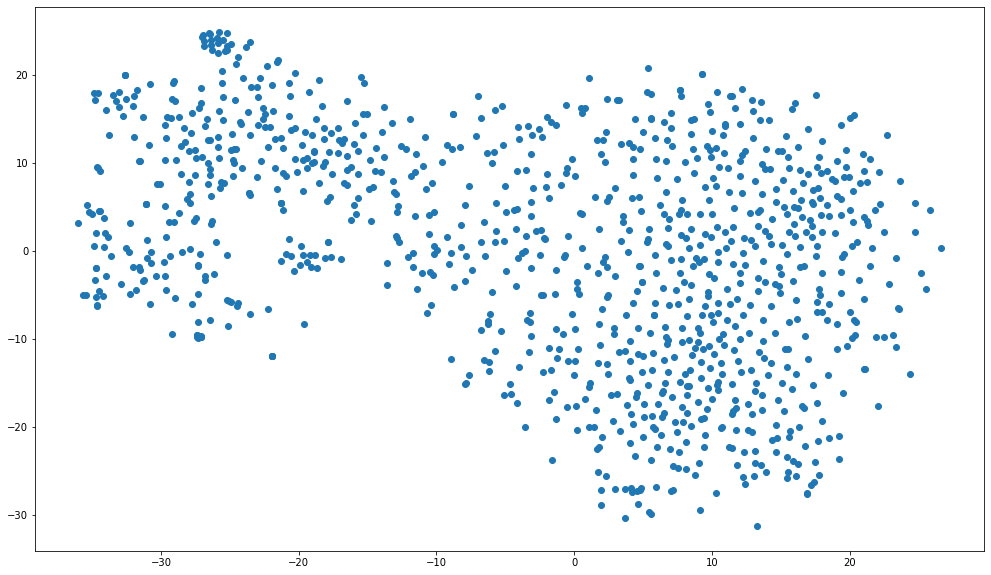

In [92]:
plt.figure(figsize = (17, 10), facecolor = None)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

# Transfer Learning implémenté dans Keras sur VGG16

referans : https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

In [93]:
from tensorflow.keras.utils import img_to_array

In [94]:
# load an image from file
img = Image.open(path+list_photos[1]) # Charger une image
resize=img.resize((224, 224))
# convert the image pixels to a numpy array
image = img_to_array(resize)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

1/1 [==============================] - 0s 488ms/step
frying_pan (35.59%)


# Modèle pré-entraîné en tant que préprocesseur d'extraction de caractéristiques

In [95]:
# load an image from file
img = Image.open(path+list_photos[6]) # Charger une image
resize=img.resize((224, 224))  # Redimensionner l'image à (224,224)
# convert the image pixels to a numpy array
image = img_to_array(resize)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) # Créer la collection d'images (un seul échantillon)
# prepare the image for the VGG model
image = preprocess_input(image) # Prétraiter l'image comme le veut VGG-16

# load model
model = VGG16() # Création du modèle VGG-16 implementé par Keras
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# get extracted features
features = model.predict(image) # Prédir la classe de l'image (parmi les 4096 classes d'ImageNet)
print("Descripteurs : ", features.shape)
print()
print(features)

1/1 [==============================] - 0s 282ms/step
Descripteurs :  (1, 4096)

[[0.         0.         0.8176899  ... 0.09010142 0.         2.114456  ]]


# Créations des descripteurs de chaque image

In [96]:
# identification of key points and associated descriptors
VGG16_keypoints = []


model = VGG16() # Création du modèle VGG-16 implementé par Keras
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    img = Image.open(path+list_photos[image_num])
    resize=img.resize((224, 224))
    img = img_to_array(resize)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
    features = model.predict(img)  
    VGG16_keypoints.append(features)

VGG16_keypoints_by_img = np.asarray(VGG16_keypoints)
VGG16_keypoints_all    = np.concatenate(VGG16_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", VGG16_keypoints_all.shape)

0
1/1 [==============================] - 0s 157ms/step
100
1/1 [==============================] - 0s 157ms/step
200
1/1 [==============================] - 0s 157ms/step
300
1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 173ms/step
400
1/1 [==============================] - 0s 157ms/step
500
1/1 [==============================] - 0s 171ms/step
600
1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 141ms/step
700
1/1 [==============================] - 0s 156ms/step
800
1/1 [==============================] - 0s 173ms/step
900
1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 157ms/step
1000
1/1 [==============================] - 0s 154ms/step

Nombre de descripteurs :  (1050, 4096)


# Création des clusters de descripteurs
Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [97]:
# Determination number of clusters
temps1=time.time()

# Il ya plusieurs possibilités pour calculer k dans la littérature. 2 principales : 
# - la racine carré du nombre total de descripteurs
k = int(round(np.sqrt(len(VGG16_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(VGG16_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  32
Création de 32 clusters de descripteurs ...
temps de traitement kmeans :             1.37 secondes


# Création des features des images

In [98]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, features, image_num):
    res = kmeans.predict(features)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(features)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(VGG16_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print()
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")
print()
print(im_features)

0
100
200
300
400
500
600
700
800
900
1000

temps de création histogrammes :           147.51 secondes

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Réductions de dimension

## Réduction de dimension PCA

    La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
    L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE



In [299]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 32)
Dimensions dataset après réduction PCA :  (1050, 26)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [300]:
from sklearn import manifold, decomposition

In [99]:
X = im_features
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1050, 2)

In [ ]:
plt.figure(figsize = (17, 10), facecolor = None)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])


In [311]:
df_tsne = pd.DataFrame(X_embedded[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["category"] = y_cat_num
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

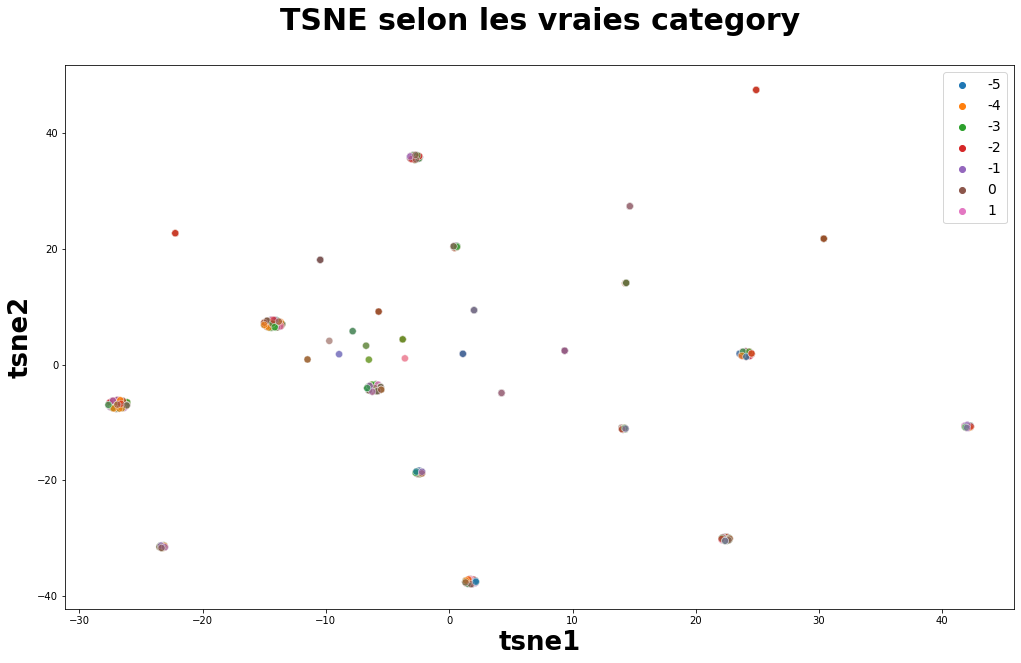

In [323]:
plt.figure(figsize=(17,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies category', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')

plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [344]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=42)
cls.fit(X_embedded)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


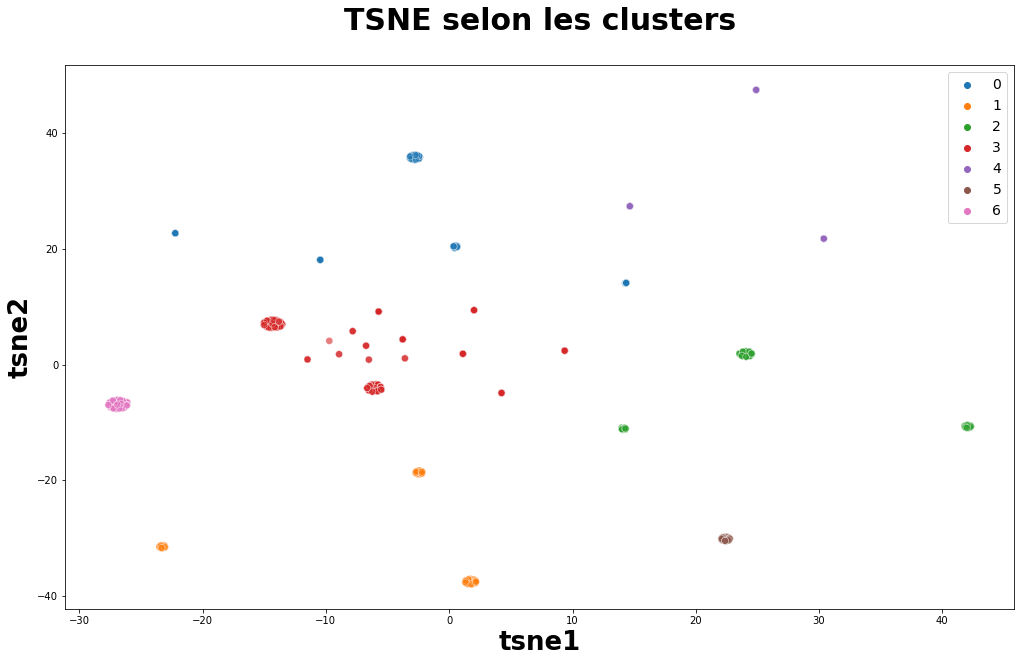

In [346]:
plt.figure(figsize=(17,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [347]:
labels = df_tsne["category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  -0.0007808788357722578


### Analyse par classes

In [348]:
df_tsne.groupby("cluster").count()["category"]

cluster
0    204
1    168
2    166
3    265
4     99
5     57
6     91
Name: category, dtype: int64

7 cluster et 7 category